#MIS325 - TERM PROJECT - HAZAL SERENÇELİK
Overleaf: https://www.overleaf.com/read/vszzyqsqytfp#e8ee6a


Data upload

In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_excel('/content/default of credit card clients.xls' ,header=1)

In [2]:
# Data information
print(dataset.info())
# Confirm that set has no NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [3]:
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Observed some mismatches with the details contributers' gave. Then, made re-naming, row drop, merging

In [4]:
# Re-naming and drops from dataset
df = dataset.copy()

# For convenience, renamed some
df = df.rename(columns={'default payment next month':'DEFAULT'})
df = df.rename(columns={'PAY_0':'PAY_1'})

# Detected that 0 is not a class in contributors' variables table
df = df.drop(df[df['MARRIAGE']==0].index)
print(df.MARRIAGE.value_counts()) # Ok version

#Class 0, 5, 6 are mislabelled, so merged them in "other" category
merged_mislabels = (df.EDUCATION == 0) | (df.EDUCATION == 5) | (df.EDUCATION == 6)
df.loc[merged_mislabels, 'EDUCATION'] = 4
print(df.EDUCATION.value_counts()) # Ok version

MARRIAGE
2    15964
1    13659
3      323
Name: count, dtype: int64
EDUCATION
2    14024
1    10581
3     4873
4      468
Name: count, dtype: int64


In [5]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000
mean,-0.016430,-0.133641,-0.166132,-0.220397,-0.265945,-0.290857
std,1.123467,1.196968,1.196428,1.168882,1.133029,1.149773
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [6]:
# Adjusting the bounds according to details given
pay_n = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pay_n:
    df.loc[df[p]<0, p] = -1
    df.loc[df[p]>=0, p] = df.loc[df[p]>=0, p] + 1
    df[p] = df[p].astype('int64')

df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000
mean,0.794196,0.664830,0.636011,0.590162,0.549456,0.517932
std,1.337248,1.393865,1.385690,1.347305,1.305872,1.322056
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


Get to know the data

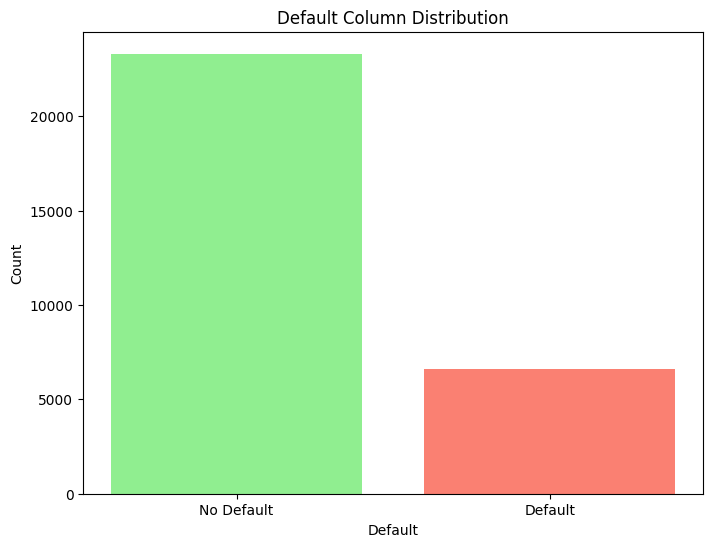

In [7]:
# A part of EDA to understand distribution
default_counts = df['DEFAULT'].value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(default_counts.index, default_counts.values, color=['lightgreen', 'salmon'])
plt.title("Default Column Distribution")
plt.xlabel("Default")
plt.ylabel("Count")
plt.xticks(default_counts.index, ['No Default', 'Default'])
plt.show()

<ipython-input-8-e939da4531a6>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(['Male', 'Female'])
<ipython-input-8-e939da4531a6>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'])
<ipython-input-8-e939da4531a6>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(['Married', 'Single', 'Others'])


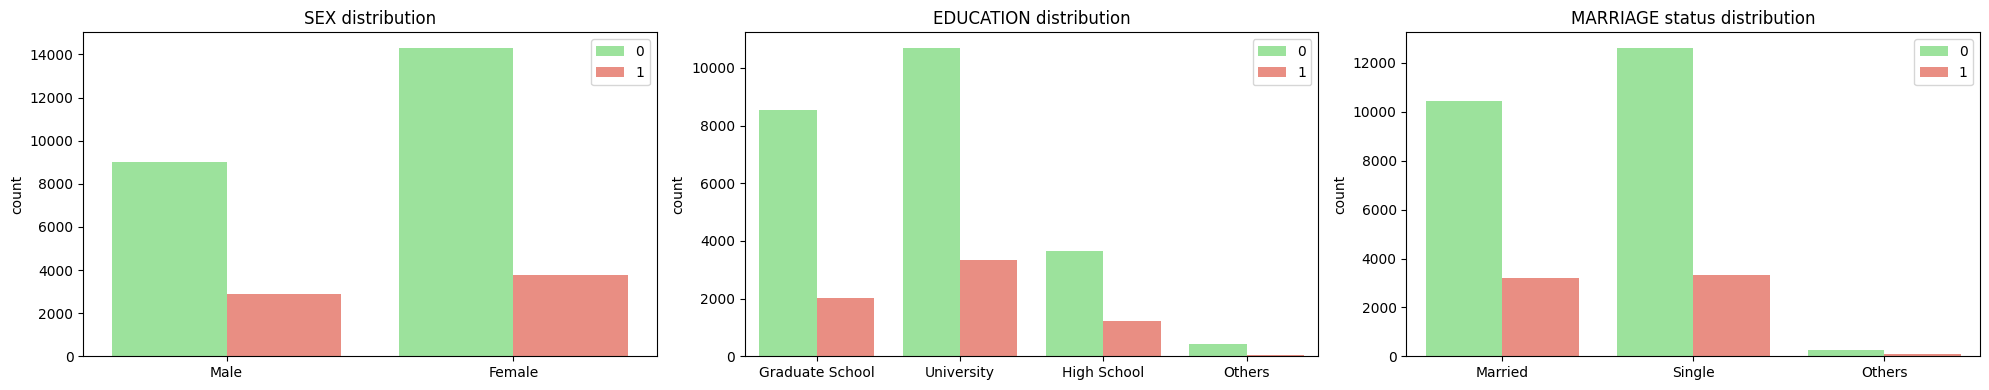

In [8]:
# Trying to understand categorical features and target relationships through bar charts showing distributions
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(20,4))
axs[0].set_title('SEX distribution')
sns.countplot(x='SEX', hue='DEFAULT', data=df, ax=axs[0], palette=['lightgreen', 'salmon'])
axs[0].set_xticklabels(['Male', 'Female'])
axs[0].set_xlabel('')
axs[0].legend()

axs[1].set_title('EDUCATION distribution')
sns.countplot(x='EDUCATION', hue='DEFAULT', data=df, ax=axs[1], palette=['lightgreen', 'salmon'])
axs[1].set_xticklabels(['Graduate School', 'University', 'High School', 'Others'])
axs[1].set_xlabel('')
axs[1].legend()

axs[2].set_title('MARRIAGE status distribution')
sns.countplot(x='MARRIAGE', hue='DEFAULT', data=df, ax=axs[2],palette=['lightgreen', 'salmon'])
axs[2].set_xticklabels(['Married', 'Single', 'Others'])
axs[2].set_xlabel('')
axs[2].legend()

fig.tight_layout()
plt.show()

# Can do some conclusion about target, such women are more likely to be classified as class 0 (non-default)

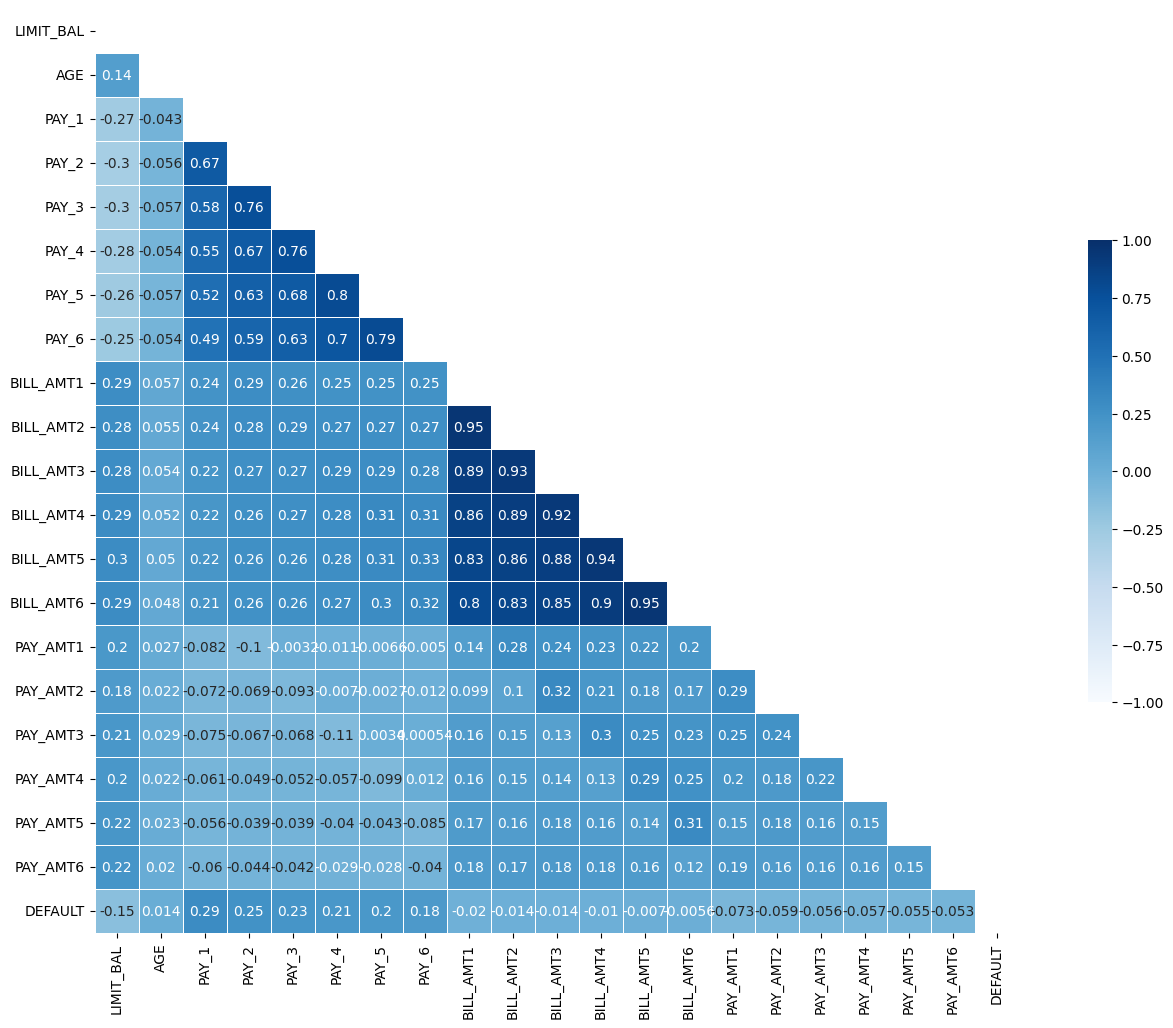

In [9]:
# Trying to observe which numeric features is related with the target most through corr coef.
numeric = ['LIMIT_BAL','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'DEFAULT']
corr = df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5,cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

# Saw that past payments are highly corr with each other while any feature & target corr are quite low. Past payments are more correlated with the target as well.

LIMIT_BAL   -0.153783
AGE          0.014129
PAY_1        0.291316
PAY_2        0.247853
PAY_3        0.225582
PAY_4        0.209088
PAY_5        0.197487
PAY_6        0.180532
BILL_AMT1   -0.019890
BILL_AMT2   -0.014377
BILL_AMT3   -0.014312
BILL_AMT4   -0.010378
BILL_AMT5   -0.006987
BILL_AMT6   -0.005612
PAY_AMT1    -0.072864
PAY_AMT2    -0.058655
PAY_AMT3    -0.056263
PAY_AMT4    -0.056886
PAY_AMT5    -0.055242
PAY_AMT6    -0.053285
dtype: float64


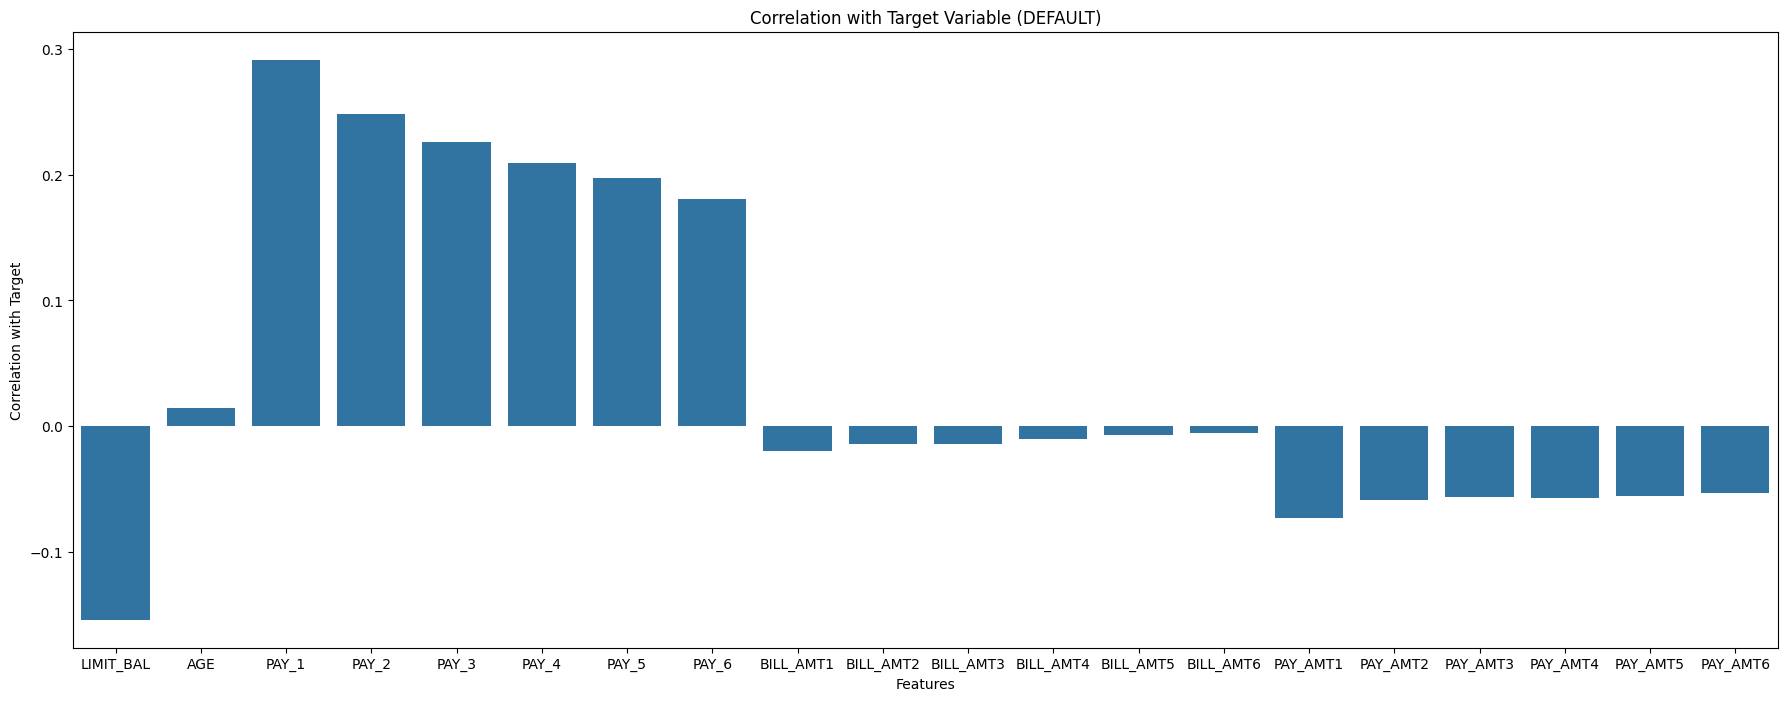

In [10]:
# Another visual to see corr below, easier to compare features with this one
target_correlation = df[numeric].drop(columns=['DEFAULT']).corrwith(df['DEFAULT'])
print(target_correlation)

plt.figure(figsize=(22, 8))
sns.barplot(x=target_correlation.index, y=target_correlation.values)
plt.xlabel("Features")
plt.ylabel("Correlation with Target")
plt.title("Correlation with Target Variable (DEFAULT)")
plt.show()

Wanted to leave enconding for categorical features, made them new features taking binary response. Feature engineering & transformation

In [11]:
#did not want to apperance of ordinality, transformed some features

df['GRAD_SCHOOL'] = (df['EDUCATION'] == 1).astype('category')
df['UNIVERSITY'] = (df['EDUCATION'] == 2).astype('category')
df['HIGH_SCHOOL'] = (df['EDUCATION'] == 3).astype('category')
df.drop('EDUCATION', axis=1, inplace=True)

df['MALE'] = (df['SEX'] == 1).astype('category')
df['FEMALE'] = (df['SEX'] == 2).astype('category')
df.drop('SEX', axis=1, inplace=True)

df['MARRIED'] = (df['MARRIAGE'] == 1).astype('category')
df['SINGLE'] = (df['MARRIAGE'] == 2).astype('category')
df['OTHER MARITAL'] = (df['MARRIAGE'] == 3).astype('category')
df.drop('MARRIAGE', axis=1, inplace=True)

df.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,FEMALE,MARRIED,SINGLE,OTHER MARITAL
0,1,20000,24,3,3,-1,-1,-1,-1,3913,...,0,1,False,True,False,False,True,True,False,False
1,2,120000,26,-1,3,1,1,1,3,2682,...,2000,1,False,True,False,False,True,False,True,False
2,3,90000,34,1,1,1,1,1,1,29239,...,5000,0,False,True,False,False,True,False,True,False
3,4,50000,37,1,1,1,1,1,1,46990,...,1000,0,False,True,False,False,True,True,False,False
4,5,50000,57,-1,1,-1,1,1,1,8617,...,679,0,False,True,False,True,False,True,False,False


Data Partition for Scaling and then training the model

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# X: features, y: target as usual
X = df.drop('DEFAULT', axis=1, inplace=False)
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, stratify=y)
print('Training set shape: ', np.shape(X_train)) # to see split
print('Test set shape: ', np.shape(X_test))

Training set shape:  (22459, 29)
Test set shape:  (7487, 29)


In [13]:
X # no such problem observed

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,FEMALE,MARRIED,SINGLE,OTHER MARITAL
0,1,20000,24,3,3,-1,-1,-1,-1,3913,...,0,0,False,True,False,False,True,True,False,False
1,2,120000,26,-1,3,1,1,1,3,2682,...,0,2000,False,True,False,False,True,False,True,False
2,3,90000,34,1,1,1,1,1,1,29239,...,1000,5000,False,True,False,False,True,False,True,False
3,4,50000,37,1,1,1,1,1,1,46990,...,1069,1000,False,True,False,False,True,True,False,False
4,5,50000,57,-1,1,-1,1,1,1,8617,...,689,679,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,1,1,1,1,1,1,188948,...,5000,1000,False,False,True,True,False,True,False,False
29996,29997,150000,43,-1,-1,-1,-1,1,1,1683,...,0,0,False,False,True,True,False,False,True,False
29997,29998,30000,37,5,4,3,-1,1,1,3565,...,2000,3100,False,True,False,True,False,False,True,False
29998,29999,80000,41,2,-1,1,1,1,-1,-1645,...,52964,1804,False,False,True,True,False,True,False,False


<ipython-input-16-d65cc5022b79>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(numeric, rotation=25)
<ipython-input-16-d65cc5022b79>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(numeric, rotation=25)


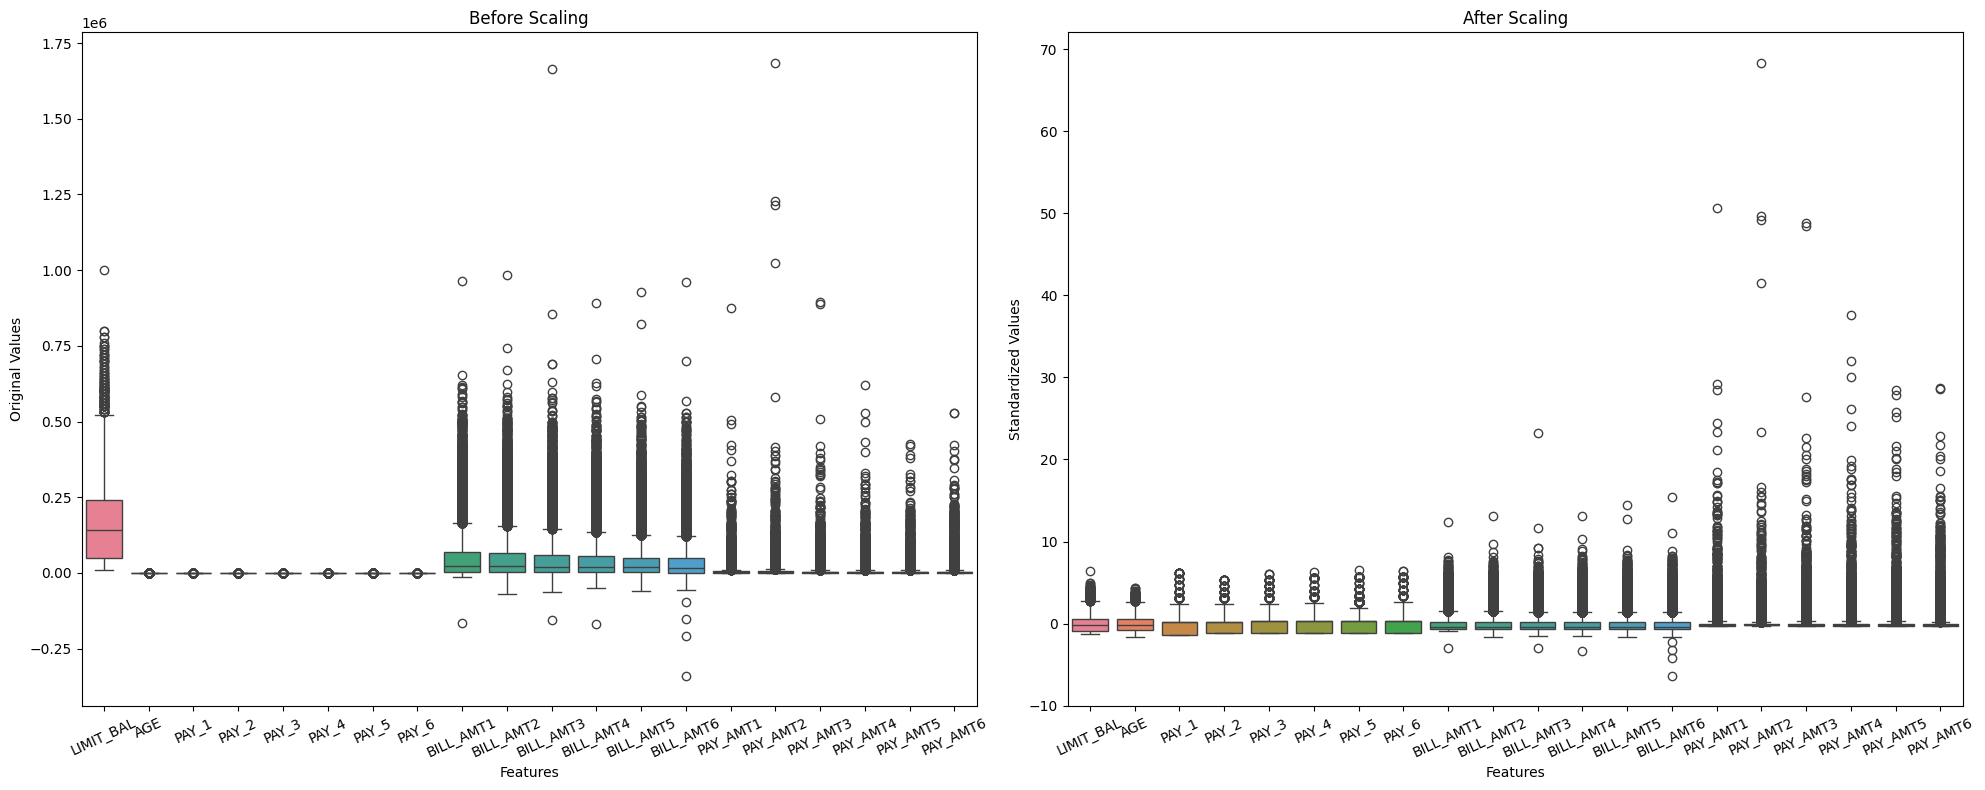

In [16]:
# Initialize the scaler
scaler = StandardScaler()

# Scaled training and testing datasets, not directly assigned X_train-X_test since some models do not require scaled set
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Needed to list numeric and categorical features to use later, cannot scale categorical ones
numeric = ['LIMIT_BAL','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
categorical = ['GRAD_SCHOOL', 'UNIVERSITY', 'HIGH_SCHOOL', 'MALE', 'FEMALE', 'MARRIED', 'SINGLE', 'OTHER MARITAL']

X_train_scaled = pd.concat([pd.DataFrame(scaler.fit_transform(X_train[numeric]), columns=numeric, index=X_train.index), X_train[categorical]], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(scaler.transform(X_test[numeric]), columns=numeric, index=X_test.index), X_test[categorical]], axis=1)

# Wanted to use boxplotting to compare before and after
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(data=X_train[numeric], ax=axs[0])
axs[0].set_title('Before Scaling')
axs[0].set_xticklabels(numeric, rotation=25)
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Original Values')
sns.boxplot(data=X_train_scaled[numeric], ax=axs[1])
axs[1].set_title('After Scaling')
axs[1].set_xticklabels(numeric, rotation=25)
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Standardized Values')
plt.tight_layout()
plt.show()

In [19]:
print(X_train.head())
print(X_train_scaled[:5]) # Ok. Numeric features are scaled, no disruption on categorical ones

          ID  LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
12472  12473     180000   30      1      1      1      1      1      1   
4033    4034     710000   32      1      1      1      1      1      1   
18432  18433     250000   27      3      4      3      3      1      1   
27782  27783      90000   25      1      1      1      1      1      1   
21808  21809      70000   26      1      1      1      1      1      1   

       BILL_AMT1  ...  PAY_AMT5  PAY_AMT6  GRAD_SCHOOL  UNIVERSITY  \
12472     174297  ...      3000      3000         True       False   
4033       28585  ...      5011      2011         True       False   
18432     324204  ...     14000     14000        False       False   
27782       6090  ...      1500      1000         True       False   
21808      41659  ...      1739      1770        False        True   

       HIGH_SCHOOL   MALE  FEMALE  MARRIED  SINGLE  OTHER MARITAL  
12472        False   True   False    False    True          False 

#**Classification Models**

## 1. Logistic Regression:
*   Model 1: basic log reg.
*   Model 2: log reg. with best parameters through grid search
*   Model 3: log reg. with PCA

In [20]:
# Before starting model training, wanted to check NaNs one last time
print(X_train_scaled.isna().sum())

LIMIT_BAL        0
AGE              0
PAY_1            0
PAY_2            0
PAY_3            0
PAY_4            0
PAY_5            0
PAY_6            0
BILL_AMT1        0
BILL_AMT2        0
BILL_AMT3        0
BILL_AMT4        0
BILL_AMT5        0
BILL_AMT6        0
PAY_AMT1         0
PAY_AMT2         0
PAY_AMT3         0
PAY_AMT4         0
PAY_AMT5         0
PAY_AMT6         0
GRAD_SCHOOL      0
UNIVERSITY       0
HIGH_SCHOOL      0
MALE             0
FEMALE           0
MARRIED          0
SINGLE           0
OTHER MARITAL    0
dtype: int64


                                Accuracy    Recall  Precision  F1-score
Logistic Regression             0.803259  0.184560   0.716628  0.293525
Hypertuned Logistic Regression  0.803393  0.185163   0.717290  0.294343
PCA + Logistic Regression       0.795379  0.147768   0.673077  0.242334


<ipython-input-21-39edf6273696>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results['F1-score'], y=results.index, palette='Greens')


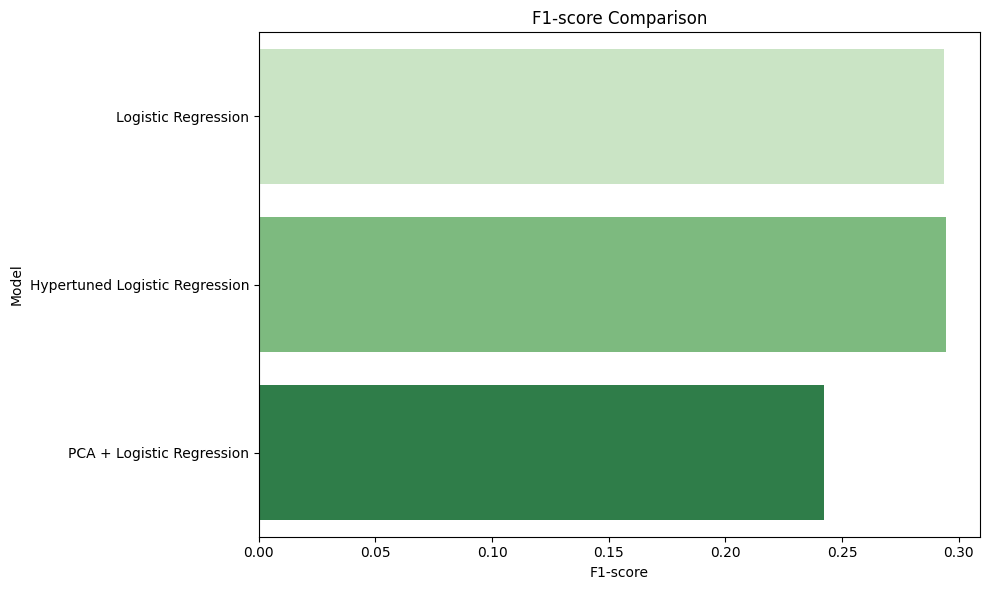

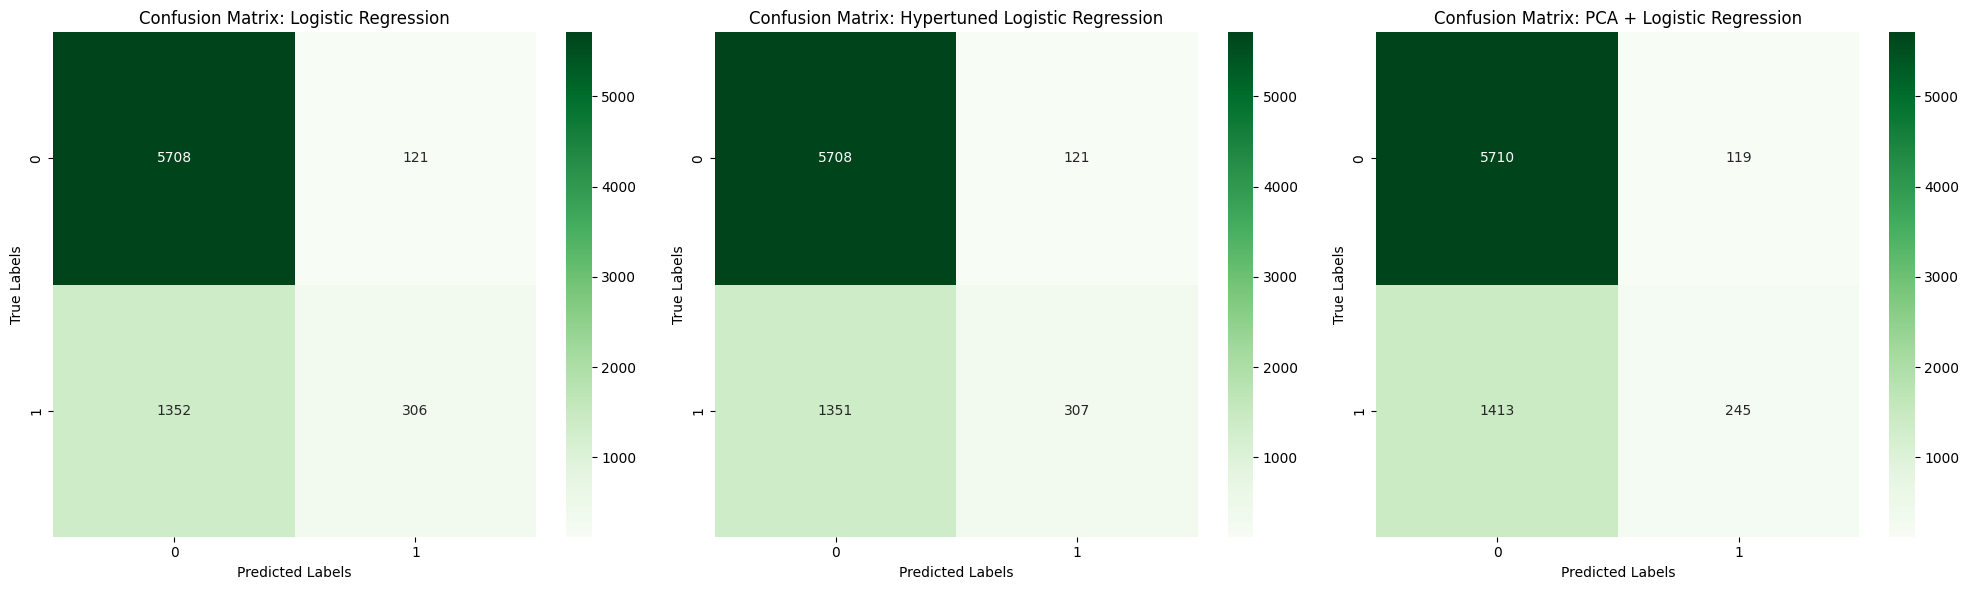

In [21]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

# Scores to evaluate performance of the model, also to compare with other models later
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

from sklearn.model_selection import GridSearchCV
# Grid Search for Best Parameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
lr_best = grid_search.best_estimator_

# Hypertuned Logistic Regression
lr_best.fit(X_train_scaled, y_train)
y_pred_best = lr_best.predict(X_test_scaled)

accuracy_best_lr = accuracy_score(y_test, y_pred_best)
recall_best_lr = recall_score(y_test, y_pred_best)
precision_best_lr = precision_score(y_test, y_pred_best)
f1_best_lr = f1_score(y_test, y_pred_best)
conf_matrix_lr_best = confusion_matrix(y_test, y_pred_best)

# PCA + Logistic Regression
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled[numeric])
X_test_pca = pca.transform(X_test_scaled[numeric])

lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)

y_pred_pca = lr_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

# 3 Models' results table
results = pd.DataFrame({
    'Accuracy': [accuracy_lr, accuracy_best_lr, accuracy_pca],
    'Recall': [recall_lr, recall_best_lr, recall_pca],
    'Precision': [precision_lr, precision_best_lr, precision_pca],
    'F1-score': [f1_lr, f1_best_lr, f1_pca]
}, index=['Logistic Regression', 'Hypertuned Logistic Regression', 'PCA + Logistic Regression'])

print(results)

# Evaluating model, selected F1-score as criteria
plt.figure(figsize=(10, 6))
sns.barplot(x=results['F1-score'], y=results.index, palette='Greens')
plt.title('F1-score Comparison')
plt.xlabel('F1-score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# Confusion matrix
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title('Confusion Matrix: Logistic Regression')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
sns.heatmap(conf_matrix_lr_best, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Confusion Matrix: Hypertuned Logistic Regression')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Greens', ax=ax[2])
ax[2].set_title('Confusion Matrix: PCA + Logistic Regression')
ax[2].set_xlabel('Predicted Labels')
ax[2].set_ylabel('True Labels')
plt.tight_layout()
plt.show()

# 2. Tree Classifiers
## Decision Tree

*   Model 1: Basic Decision Tree
*   Hypertuned Decision Tree
*   RFE on Decision Tree

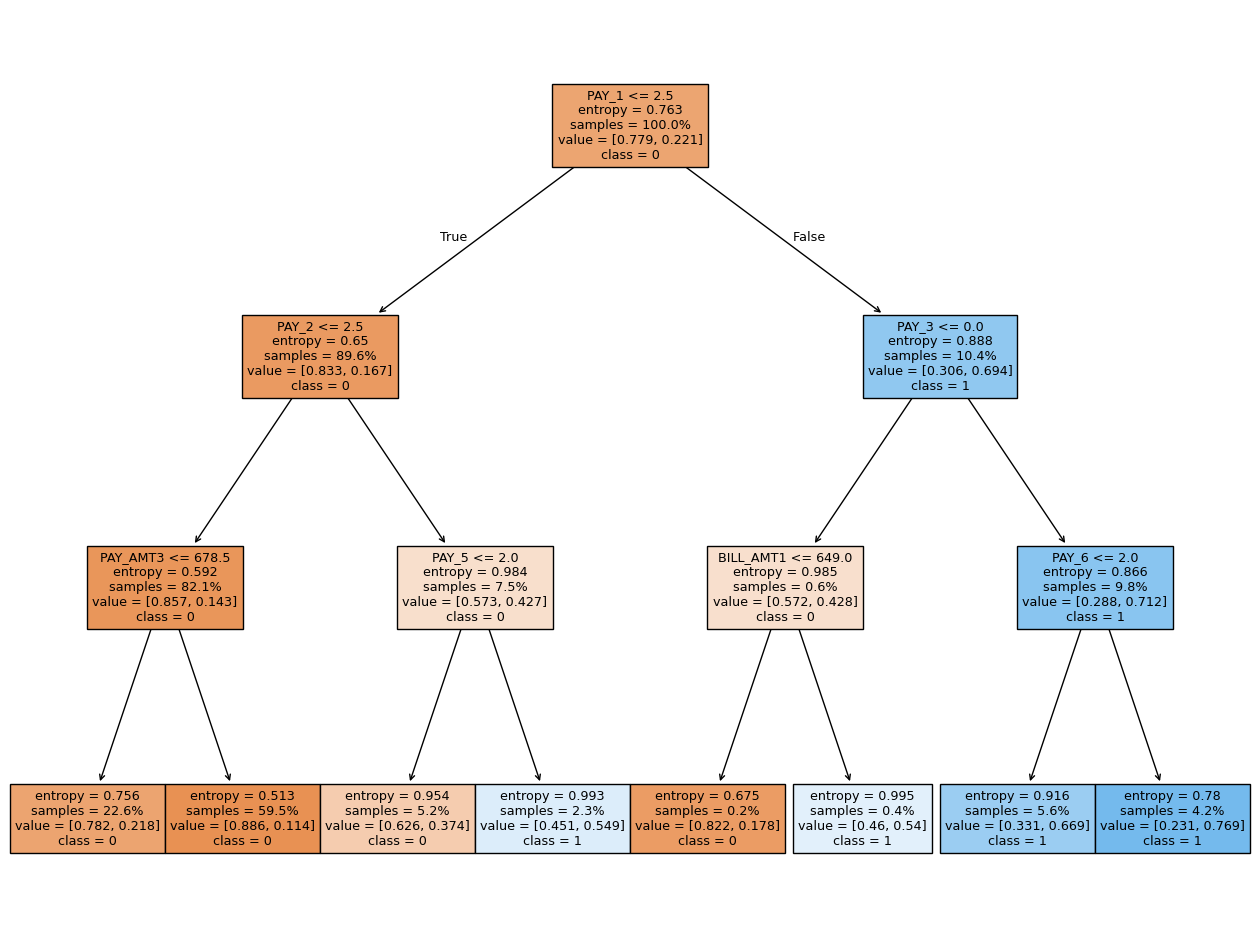

In [22]:
from sklearn import tree
# Used Entropy, both gini yields very similar results; so, didn't do gini version to compare
dc_basic = DecisionTreeClassifier(max_depth=3, criterion='entropy', max_features=None)

# Model fitting
dc_basic.fit(X_train, y_train)
plt.figure(figsize=(16,12))
tree.plot_tree(decision_tree=dc_basic,
               feature_names=X_train.columns,
               class_names=['0','1'],
               filled=True, proportion=True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


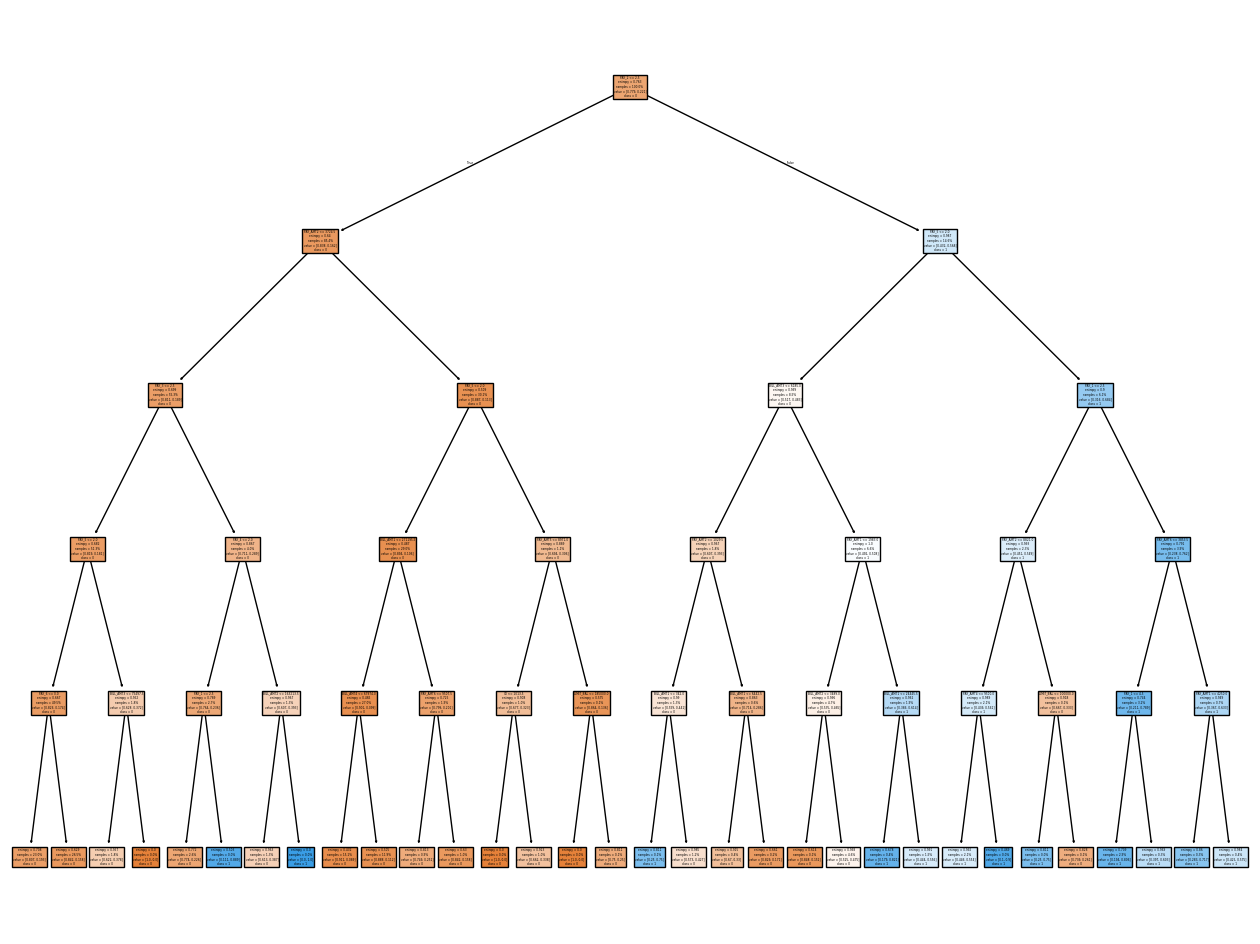

In [23]:
# Decision tree with hypermeter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
dc_best = grid_search.best_estimator_

print(best_params)

# Model fitting
dc_best.fit(X_train, y_train)
plt.figure(figsize=(16,12))
tree.plot_tree(decision_tree=dc_best,
               feature_names=X_train.columns,
               class_names=['0','1'],
               filled=True, proportion=True)
plt.show()


                          Accuracy    Recall  Precision  F1-score
Decision Tree             0.818886  0.378770   0.658281  0.480858
Hypertuned Decision Tree  0.796314  0.223764   0.609195  0.327305


<ipython-input-24-a24cf0c91e62>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_dc['F1-score'], y=results_dc.index, palette='Greens')


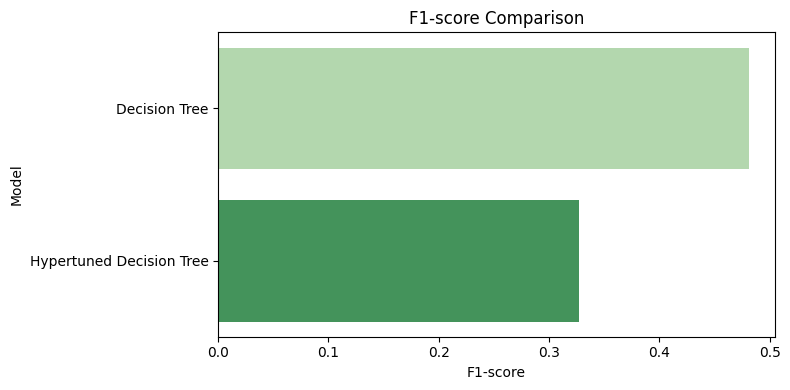

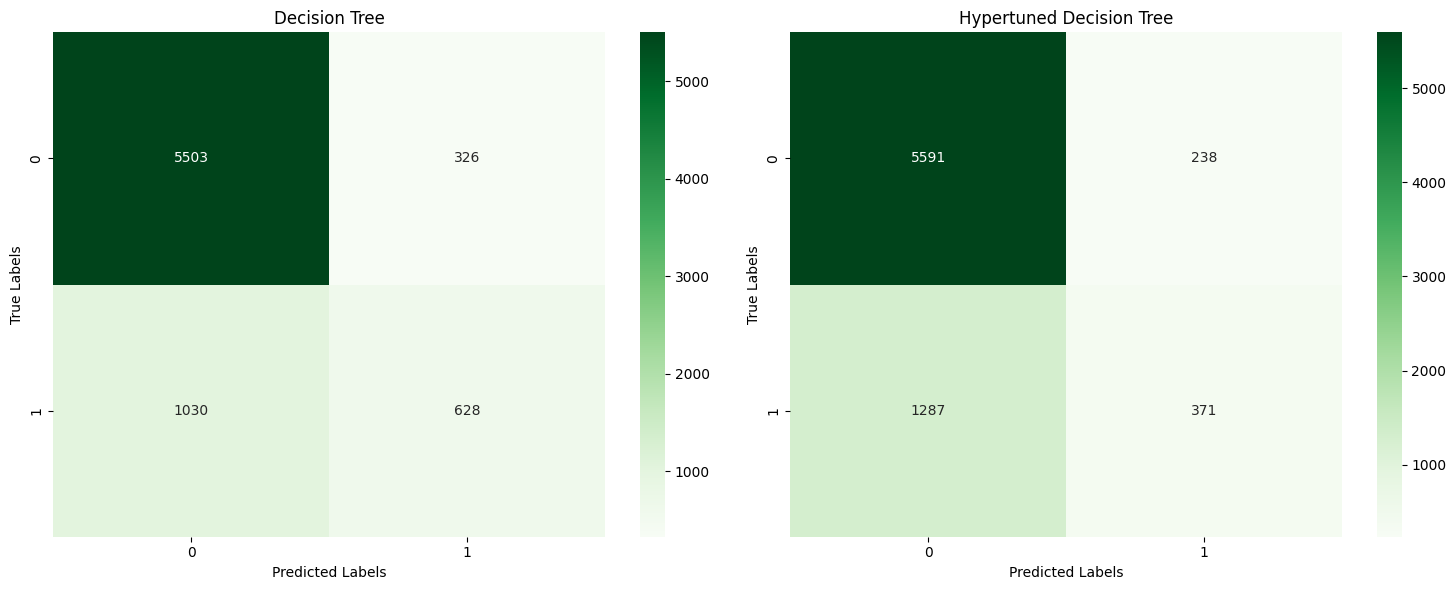

In [24]:
y_pred_dc = dc_basic.predict(X_test)
y_pred_dc_best = dc_best.predict(X_test)

# Scores to evaluate performance of the models, also to compare with other models
accuracy_dc_basic = accuracy_score(y_test, y_pred_dc)
recall_dc_basic = recall_score(y_test, y_pred_dc)
precision_dc_basic = precision_score(y_test, y_pred_dc)
f1__dc_basic = f1_score(y_test, y_pred_dc)
conf_matrix_dc_basic = confusion_matrix(y_test, y_pred_dc)

accuracy_dc_best = accuracy_score(y_test, y_pred_dc_best)
recall_dc_best = recall_score(y_test, y_pred_dc_best)
precision_dc_best = precision_score(y_test, y_pred_dc_best)
f1__dc_best = f1_score(y_test, y_pred_dc_best)
conf_matrix_dc_best = confusion_matrix(y_test, y_pred_dc_best)


results_dc = pd.DataFrame({
    'Accuracy': [accuracy_dc_basic, accuracy_dc_best],
    'Recall': [recall_dc_basic, recall_dc_best],
    'Precision': [precision_dc_basic, precision_dc_best],
    'F1-score': [f1__dc_basic, f1__dc_best]
}, index=['Decision Tree', 'Hypertuned Decision Tree'])

print(results_dc)

# Evaluating model, selected F1-score as criteria
plt.figure(figsize=(8, 4))
sns.barplot(x=results_dc['F1-score'], y=results_dc.index, palette='Greens')
plt.title('F1-score Comparison')
plt.xlabel('F1-score')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

# Confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(conf_matrix_dc_basic, annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title('Decision Tree')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')
sns.heatmap(conf_matrix_dc_best, annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Hypertuned Decision Tree')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

Index(['PAY_1', 'PAY_2', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
                        Accuracy    Recall  Precision  F1-score
Decision Tree with RFE  0.812609  0.309409    0.66537  0.422396


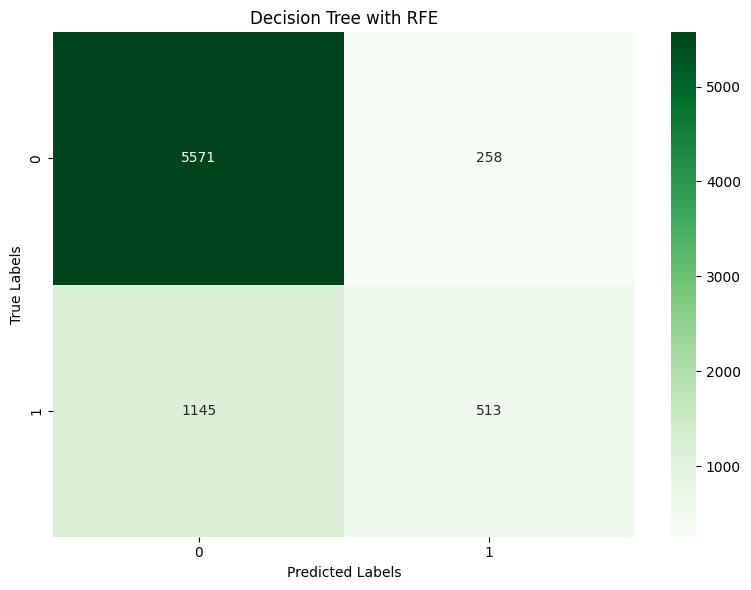

In [26]:
# RFE on Decision Tree
from sklearn.feature_selection import RFE
rfe = RFE(estimator=dc_best, n_features_to_select=10)

rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print(selected_features)

# Using same hyperparameters from the best model
dc_rfe = DecisionTreeClassifier(**dc_best.get_params())
dc_rfe.fit(X_train[selected_features], y_train)

# Evaluate the RFE Decision Tree
y_pred_dc_rfe = dc_rfe.predict(X_test[selected_features])

accuracy_rfe_dc = accuracy_score(y_test, y_pred_dc_rfe)
recall_rfe_dc = recall_score(y_test, y_pred_dc_rfe)
precision_rfe_dc = precision_score(y_test, y_pred_dc_rfe)
f1_rfe_dc = f1_score(y_test, y_pred_dc_rfe)
conf_matrix_rfe_dc = confusion_matrix(y_test, y_pred_dc_rfe)

results_rfe = pd.DataFrame({
    'Accuracy': [accuracy_rfe_dc],
    'Recall': [recall_rfe_dc],
    'Precision': [precision_rfe_dc],
    'F1-score': [f1_rfe_dc]
}, index=['Decision Tree with RFE'])

print(results_rfe)

# Confusion matrix
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(conf_matrix_rfe_dc, annot=True, fmt='d', cmap='Greens', ax=ax)
ax.set_title('Decision Tree with RFE')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.tight_layout()
plt.show()

## 3. KNN


*   Evaluation matrix
*   A theatrical basic decision boundary visual






     Accuracy    Recall  Precision  F1-score
KNN  0.789368  0.343788   0.538244   0.41958


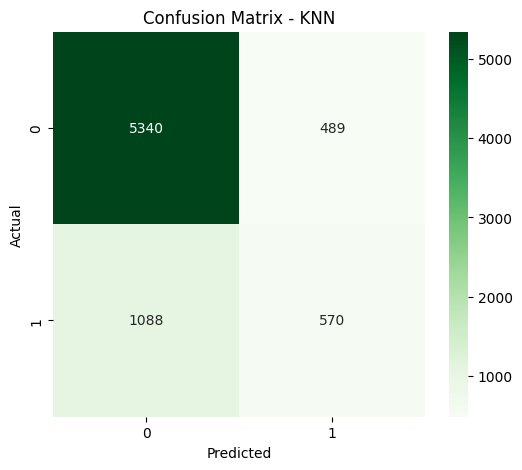

In [28]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_model.fit(X_train_scaled, y_train.values.ravel())

# Evaluating the model
knn_y_pred = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, knn_y_pred)
recall_knn = recall_score(y_test, knn_y_pred)
precision_knn = precision_score(y_test, knn_y_pred)
f1_knn = f1_score(y_test, knn_y_pred)
conf_matrix_knn = confusion_matrix(y_test, knn_y_pred)

# Results
results_knn = pd.DataFrame({
    'Accuracy': [accuracy_knn],
    'Recall': [recall_knn],
    'Precision': [precision_knn],
    'F1-score': [f1_knn]
}, index=['KNN'])
print(results_knn)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


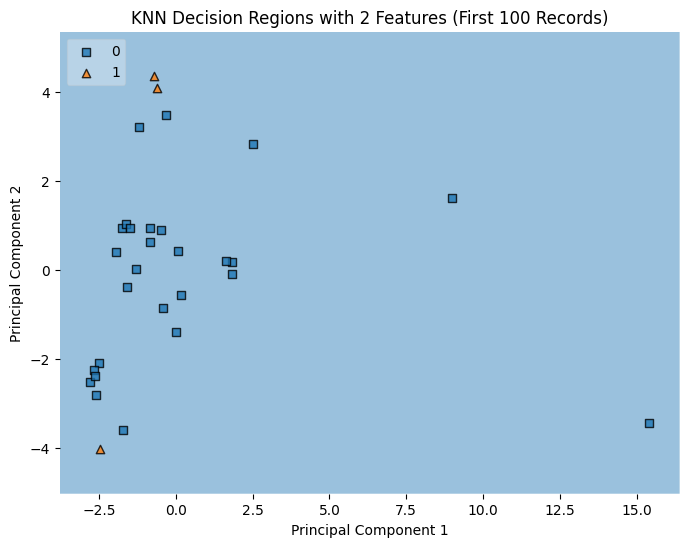

In [37]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Use only the first 100 records for interpretability
X_train_sampled = X_train_scaled[:30]  # changed to many times to capture good boundary
y_train_sampled = y_train.iloc[:30]

# PCA for dimensionality reduction (2 components for plotting)
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_sampled)
X_test_reduced = pca.transform(X_test_scaled)

# Training the KNN model on PCA-reduced data
knn_reduced = KNeighborsClassifier(n_neighbors=5)
knn_reduced.fit(X_train_reduced, y_train_sampled.values.ravel())

# Plot decision regions
plt.figure(figsize=(8, 6))
plot_decision_regions(X_train_reduced, y_train_sampled.values.ravel(), clf=knn_reduced, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Regions with 2 Features (First 100 Records)')
plt.show()


## Conclusion on all results

In [33]:
model = {
    'Accuracy' : [accuracy_lr,accuracy_best_lr,accuracy_pca,accuracy_dc_basic,accuracy_dc_best,accuracy_rfe_dc,accuracy_knn],
    'Recall Score' : [recall_lr,recall_best_lr,recall_pca,recall_dc_basic,recall_dc_best,recall_rfe_dc,recall_knn],
    'Precision Score' : [precision_lr,precision_best_lr,precision_pca,precision_dc_basic,precision_dc_best,precision_rfe_dc,precision_knn],
    'F1 Score' : [f1_lr,f1_best_lr,f1_pca, f1__dc_basic,f1__dc_best, f1_rfe_dc, f1_knn],
}

result_all_models = pd.DataFrame(model,index=['Logistic Regression Model', 'Logistic Regression with Hypermeter Tuning', 'Logistic Regression + PCA', 'Basic Decision Tree', 'Decision Tree with Hypermeter Tuning', 'Decision Tree with RFE', 'K Nearest Neighbour'])
result_all_models

,Accuracy,Recall Score,Precision Score,F1 Score
Logistic Regression Model,0.803259,0.184560,0.716628,0.293525
Logistic Regression with Hypermeter Tuning,0.803393,0.185163,0.717290,0.294343
Logistic Regression + PCA,0.795379,0.147768,0.673077,0.242334
Basic Decision Tree,0.818886,0.378770,0.658281,0.480858
Decision Tree with Hypermeter Tuning,0.796314,0.223764,0.609195,0.327305
Decision Tree with RFE,0.812609,0.309409,0.665370,0.422396
K Nearest Neighbour,0.789368,0.343788,0.538244,0.419580
